In [ ]:
from automate_evaluation import automate_evaluation

stream_file_folder = "/Users/xiaodong/Desktop/UOX-data/UOX1"

weights_list = [
    (1, 1, 1, 1, 1, 1)
]

lattice = "oI"  # Pearson Symbol read from .cell file first letter for lattice type and second for centering

automate_evaluation(stream_file_folder, weights_list, lattice)


Skipping /Users/xiaodong/Desktop/UOX-data/UOX1/UOX1_-512_-512.stream as it appears to have been processed already.
Skipping /Users/xiaodong/Desktop/UOX-data/UOX1/best_results_IQM_SUM_1_1_1_1_1_1.stream as it appears to have been processed already.
Evaluating multiple stream files with weights: (10, 1, 1, 1, 1, 1)


Processing chunks in UOX1_-512_-512.stream: 100%|██████████| 5323/5323 [07:02<00:00, 12.60chunk/s]


Combined metrics CSV written to /Users/xiaodong/Desktop/UOX-data/UOX1/combined_metrics_IQM_SUM_10_1_1_1_1_1.csv
Best results stream file written to /Users/xiaodong/Desktop/UOX-data/UOX1/best_results_IQM_SUM_10_1_1_1_1_1.stream
Writing .sol file from stream: /Users/xiaodong/Desktop/UOX-data/UOX1/best_results_IQM_SUM_10_1_1_1_1_1.stream
Total number of indexed frames : 2337


Mean combined_metric: 0.0000
Standard deviation: 10.7301
Cutoff threshold (mean + 1.0 std): 10.7301
Event numbers (207) and combined metric values above the cutoff threshold:
Event 1023-1: Combined Metric = 39.7575
Event 1038-1: Combined Metric = 12.5169
Event 1042-1: Combined Metric = 20.0576
Event 1043-1: Combined Metric = 26.9545
Event 106-1: Combined Metric = 26.4992
Event 1065-1: Combined Metric = 74.0153
Event 108-1: Combined Metric = 31.5626
Event 1082-1: Combined Metric = 20.0363
Event 1088-1: Combined Metric = 11.5576
Event 109-1: Combined Metric = 25.1876
Event 1131-1: Combined Metric = 37.2997
Event 1211-1: Combined Metric = 14.9360
Event 1248-1: Combined Metric = 28.9000
Event 1258-1: Combined Metric = 36.4081
Event 1261-1: Combined Metric = 20.6700
Event 1270-1: Combined Metric = 17.6064
Event 1286-1: Combined Metric = 10.9380
Event 1308-1: Combined Metric = 41.1859
Event 134-1: Combined Metric = 26.7916
Event 14-1: Combined Metric = 20.9554
Event 1412-1: Combined Metric =

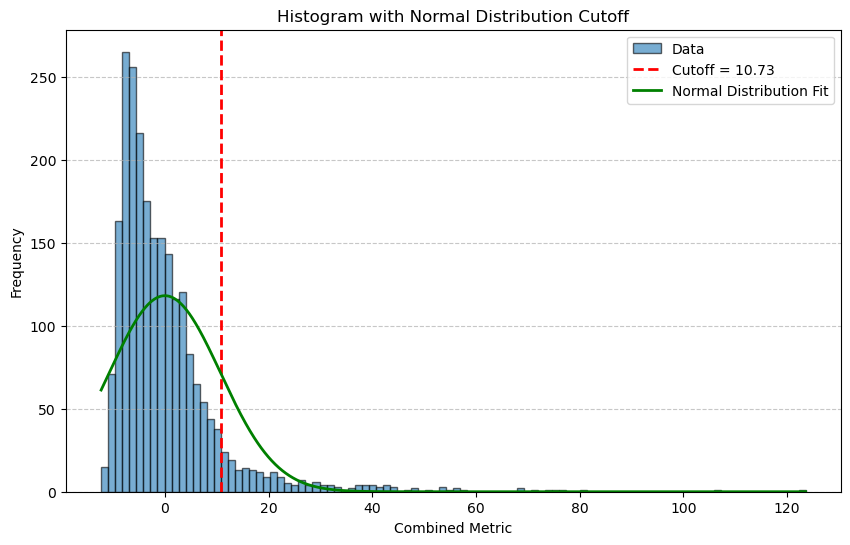

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm  # optional, if you want to plot the fitted PDF

# Load your data
weights_string = "_".join(map(str, weights_list[0]))
csv_path = f"{stream_file_folder}/combined_metrics_IQM_SUM_{weights_string}.csv"
df = pd.read_csv(csv_path)

# Group by event_number and get the minimum combined_metric for each event.
grouped_series = df.groupby("event_number")["combined_metric"].min()

# Compute statistics of the combined_metric
mean_metric = grouped_series.mean()
std_metric = grouped_series.std()
std_multiplier = 1.0  # you can change this multiplier to adjust the cutoff threshold

# Define cutoff as mean + (std_multiplier * standard deviation)
cutoff = mean_metric + std_multiplier * std_metric
print(f"Mean combined_metric: {mean_metric:.4f}")
print(f"Standard deviation: {std_metric:.4f}")
print(f"Cutoff threshold (mean + {std_multiplier} std): {cutoff:.4f}")

# Identify events with a combined_metric above the cutoff threshold.
cutoff_series = grouped_series[grouped_series > cutoff]
cutoff_events = cutoff_series.index.tolist()
cutoff_metrics = cutoff_series.values.tolist()

cutoff_number = len(cutoff_events)

print(f"Event numbers ({cutoff_number}) and combined metric values above the cutoff threshold:")
for event, metric in zip(cutoff_events, cutoff_metrics):
    print(f"Event {event}: Combined Metric = {metric:.4f}")

# Optionally, write out the events that exceed the cutoff threshold to a CSV file.
output_df = pd.DataFrame({
    "event_number": cutoff_events,
    "combined_metric": cutoff_metrics
})
output_csv_path = f"{stream_file_folder}/cutoff_events_with_metrics.csv"
output_df.to_csv(output_csv_path, index=False)
print(f"\nCut-off Event and their metrics have been written to: {output_csv_path}")

# Plot the histogram of the data with the cutoff threshold indicated.
plt.figure(figsize=(10, 6))
plt.hist(grouped_series.values, bins=100, edgecolor='black', alpha=0.6, label='Data')
plt.axvline(cutoff, color='red', linestyle='dashed', linewidth=2, label=f'Cutoff = {cutoff:.2f}')

# Optionally, overlay the fitted normal distribution curve.
x_values = np.linspace(grouped_series.min(), grouped_series.max(), 1000)
pdf_values = norm.pdf(x_values, loc=mean_metric, scale=std_metric)
# Scale the PDF to match the histogram
bin_width = (grouped_series.max() - grouped_series.min()) / 100.0
pdf_values_scaled = pdf_values * len(grouped_series) * bin_width
plt.plot(x_values, pdf_values_scaled, color='green', linewidth=2, label='Normal Distribution Fit')

plt.title("Histogram with Normal Distribution Cutoff")
plt.xlabel("Combined Metric")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Optimal cutoff determined by K-Means: 0.7637
Event numbers (798) and combined metric values to be cut off:
Event 1000-1: Combined Metric = 1.9012
Event 1005-1: Combined Metric = 3.1417
Event 1006-1: Combined Metric = 0.8807
Event 1012-1: Combined Metric = 1.3099
Event 1016-1: Combined Metric = 7.2362
Event 1018-1: Combined Metric = 3.9071
Event 1019-1: Combined Metric = 3.1019
Event 1023-1: Combined Metric = 5.4455
Event 1024-1: Combined Metric = 3.0598
Event 1025-1: Combined Metric = 1.0691
Event 1029-1: Combined Metric = 1.4061
Event 1032-1: Combined Metric = 5.7606
Event 1034-1: Combined Metric = 2.2686
Event 1037-1: Combined Metric = 1.2924
Event 1038-1: Combined Metric = 11.2270
Event 1039-1: Combined Metric = 3.1244
Event 1042-1: Combined Metric = 3.3224
Event 1043-1: Combined Metric = 3.8216
Event 106-1: Combined Metric = 1.4233
Event 1065-1: Combined Metric = 10.1523
Event 1079-1: Combined Metric = 1.1083
Event 108-1: Combined Metric = 5.4017
Event 1082-1: Combined Metric = 3.6

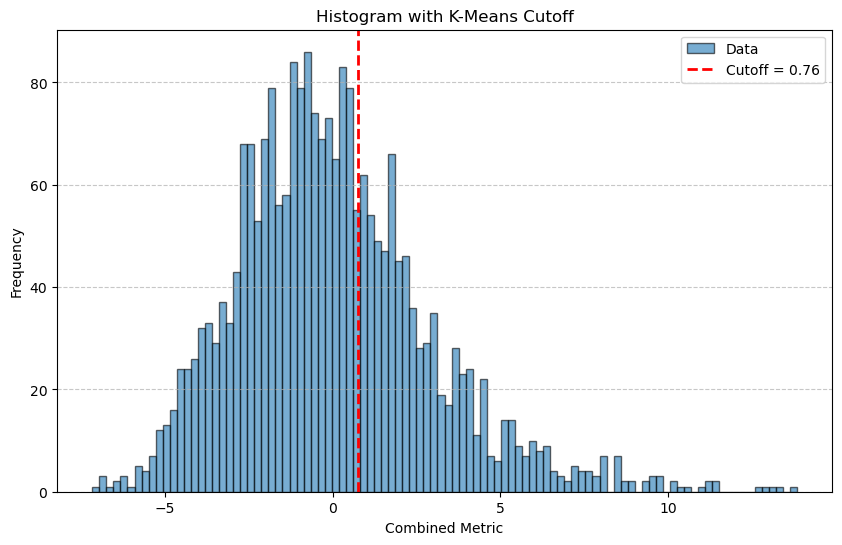

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load your data
weights_string = "_".join(map(str, weights_list[0]))
csv_path = f"{stream_file_folder}/combined_metrics_IQM_SUM_{weights_string}.csv"
df = pd.read_csv(csv_path)

# Group by event_number and get the minimum combined_metric for each event.
# This preserves the event_number as the index.
grouped_series = df.groupby("event_number")["combined_metric"].min()

# Reshape the values for clustering (each value in its own row)
grouped_values = grouped_series.values.reshape(-1, 1)

# Apply K-Means with n clusters
n = 2
kmeans = KMeans(n_clusters=n, random_state=0)
kmeans.fit(grouped_values)
labels = kmeans.labels_
centers = kmeans.cluster_centers_.flatten()

# Since lower combined_metric is better, we want to flag the cluster with the higher center.
# The cluster with the higher center (worse metrics) is the one to cut off.
cutoff_label = np.argmax(centers)

# Compute a cutoff threshold as the mean of the two centers.
# This threshold is a rough boundary between the clusters.
sorted_centers = np.sort(centers)
cutoff = np.mean(sorted_centers)
print(f"Optimal cutoff determined by K-Means: {cutoff:.4f}")

# Identify the events that belong to the "cut off" cluster (i.e. those with higher combined_metric)
cutoff_mask = labels == cutoff_label
cutoff_events = grouped_series[cutoff_mask].index.tolist()
cutoff_metrics = grouped_series[cutoff_mask].values.tolist()
cutoff_number = len(cutoff_events)
print(f"Event numbers ({cutoff_number}) and combined metric values to be cut off:")
for event, metric in zip(cutoff_events, cutoff_metrics):
    print(f"Event {event}: Combined Metric = {metric:.4f}")

# Optionally, write out the cut-off events and their combined metric values to a CSV file.
output_df = pd.DataFrame({
    "event_number": cutoff_events,
    "combined_metric": cutoff_metrics
})
output_csv_path = f"{stream_file_folder}/cutoff_events_with_metrics.csv"
output_df.to_csv(output_csv_path, index=False)
print(f"\nCut-off events and their metrics have been written to: {output_csv_path}")

# Plot the histogram with the cutoff threshold indicated
plt.figure(figsize=(10, 6))
plt.hist(grouped_values, bins=100, edgecolor='black', alpha=0.6, label='Data')
plt.axvline(cutoff, color='red', linestyle='dashed', linewidth=2, label=f'Cutoff = {cutoff:.2f}')
plt.title("Histogram with K-Means Cutoff")
plt.xlabel("Combined Metric")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
